In [82]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from bs4 import BeautifulSoup
import json
import re
import string
import math
import spacy

from datetime import datetime, timedelta

from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from scipy.stats import shapiro

from scipy.stats import pearsonr
from scipy import stats


## Exploratory Data Analysis (EDA) on Text Data of Facebook adds

## About Dataset
This database, updated daily, contains ads that ran on Facebook and were submitted by thousands of ProPublica(an independent, nonprofit newsroom that produces investigative journalism with moral force) users from around the world. We asked our readers to install browser extensions that automatically collected advertisements on their Facebook pages and sent them to our servers. We then used a machine learning classifier to identify which ads were likely political and included them in this dataset. 

Source :https://www.kaggle.com/datasets/mrmorj/political-advertisements-from-facebook

Colums and what they represent
1. **id** :post id number on facebook

2. **html** :HTML of the ad as collected by the Political Ad Collector 

3. **political** :number of Political Ad Collector users who have voted that the ad is political 

4. **not_political** : number of Political Ad Collector users who have voted that the ad is not political 

5. **title** : ad title   

6. **message** : ad content 

7. **thumbnail** : link for a thumbnail of the profile image (of the advertiser  

8. **created_at** : date ad was first collected by the Political Ad Collector 

9. **updated_at** :  the most recent time that it got an impression OR the most recent time it was voted on

10. **lang** : language of the ad. always en-US 

11. **images** : images associated with the Facebook political advertisements in the datase

12. **impressions** :  It represents the total count of ad views or impressions received during a specific time period

13. **political_probability** :In the context of Facebook political ads, "political probability" could refer to the likelihood or probability of achieving specific political outcomes or goals through the deployment of these ads

14. **targeting** : targeting criteria used for the Facebook political advertisements in the dataset.

15. **suppressed** :Indicates whether the ad was suppressed or not. Suppression may occur for various reasons, such as violation of advertising policies or other content-related issues


16. **targets** : Represents the targets of the ad campaign. It could include information about the specific audience or demographic the advertiser aims to reach with the ad.


17. **advertiser** :Identifies the entity or organization that placed the advertisement on Facebook.


18. **entities ** : Refers to entities mentioned or involved in the ad, which could include individuals, organizations, or other entities.


19. **page**  : Represents the Facebook page associated with the ad. It indicates the source or origin of the ad.


20. **lower_page** :It's not clear from the provided list. It could potentially be a processed or transformed version of the 'page' column.


21. **targetings** : Describes the targeting criteria used for the ad. This could include demographic information, geographic targeting, or other parameters used to reach a specific audience.


22. **paid_for_by**  : Indicates the entity or organization that financially supported or paid for the ad campaign.


23. **targetedness** : refers to the precision and specificity with which advertisers can direct their messages to a particular audience based on various demographic, geographic, and interest-based criteria

24. **listbuilding_fundraising_proba**  :it might indicate the probability or likelihood of getting funding


# loading the data

In [2]:

df = pd.read_csv("/Users/ericthande/Downloads/fbpac-ads-en-US.csv")

df

id  \
0       hyperfeed_story_id_5c9baa3ee0ec08073500042   
1       hyperfeed_story_id_5c9bb2a2413852086735771   
2       hyperfeed_story_id_5c9bb4fa461731e29426627   
3                                23843380741530360   
4       hyperfeed_story_id_5c9bb059454851c17741213   
...                                            ...   
162319                           23843108782710078   
162320                           23843034525850259   
162321                           23842997138670612   
162322  hyperfeed_story_id_5c8b16b11b8f86515960964   
162323                           23842885237930242   

                                                     html  political  \
0       <div class="_5pa- userContentWrapper"><div cla...          0   
1       <div class="_5pa- userContentWrapper"><div cla...          0   
2       <div class="_5pa- userContentWrapper"><div cla...          0   
3       <div class="_5pcr userContentWrapper"><div cla...          0   
4       <div class="_5pa- userContentWrapper"><div cla...          0   
...                                                   ...        ...   
162319  <div class="_5pcr userContentWrapper"><div cla...         12   
162320  <div class="_5pcr userContentWrapper"><div cla...          0   
162321  <div class="_5pcr userContentWrapper"><div cla...          0   
162322  <div class="_5pa- userContentWrapper"><div cla...          7   
162323  <div class="_5pcr userContentWrapper"><div cla...          0   

        not_political                                        title  \
0                   0                League of Conservation Voters   
1                   0                            Indivisible Guide   
2                   0               International Rescue Committee   
3                   0                 Covenant House International   
4                   1                           Planned Parenthood   
...               ...                                          ...   
162319              0                        Keep Them Accountable   
162320              0  National Republican Congressional Committee   
162321              0                              POW Action Fund   
162322              0                                Beto O'Rourke   
162323              0                                         ACLU   

                                                  message  \
0       <p>BREAKING: Trump’s Department of the Interio...   
1       <p>The Mueller investigation is over. Special ...   
2       <p>Zimbabwe is reeling from the impact of Cycl...   
3       <p>What more can you do in the final hours of ...   
4       <p>Say it loud, say it proud: Our rights, our ...   
...                                                   ...   
162319  <p>Rep. Katko voted for tax breaks for his wea...   
162320  <p>Illinois early voting is open NOW &amp; you...   
162321  <p>From your favorite peaks to the polling pla...   
162322  <p>Beto just announced he’s running for presid...   
162323  <p>Claim your FREE ACLU Voter sticker today to...   

                                                thumbnail  \
0       https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
1       https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
2       https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
3       https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
4       https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
...                                                   ...   
162319  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
162320  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
162321  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
162322  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
162323  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   

                           created_at                     updated_at   lang  \
0       2019-03-27 16:52:25.625455+00  2019-03-27 16:52:25.625455+00  en-US   
1       2019-03-27 17:28:14.096849+00  2019-03-27 17:28:14.096849+00 

 # **Descriptive statistics:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162324 entries, 0 to 162323
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              162324 non-null  object 
 1   html                            162324 non-null  object 
 2   political                       162324 non-null  int64  
 3   not_political                   162324 non-null  int64  
 4   title                           162306 non-null  object 
 5   message                         162324 non-null  object 
 6   thumbnail                       162324 non-null  object 
 7   created_at                      162324 non-null  object 
 8   updated_at                      162324 non-null  object 
 9   lang                            162324 non-null  object 
 10  images                          162324 non-null  object 
 11  impressions                     162324 non-null  int64  
 12  political_probab

In [4]:
df.describe().T

count      mean        std       min  \
political                       162324.0  4.177663  10.574403  0.000000   
not_political                   162324.0  0.794214   2.770883  0.000000   
impressions                     162324.0  4.605049  40.689815  0.000000   
political_probability           162324.0  0.928099   0.169513  0.000079   
targetedness                    112747.0  3.939723   1.758957  0.000000   
listbuilding_fundraising_proba  152394.0  0.545964   0.333821  0.000091   

                                     25%       50%       75%          max  
political                       0.000000  1.000000  4.000000   488.000000  
not_political                   0.000000  0.000000  1.000000   330.000000  
impressions                     1.000000  1.000000  2.000000  3575.000000  
political_probability           0.951812  0.997825  0.999978     1.000000  
targetedness                    3.000000  4.000000  4.000000    12.000000  
listbuilding_fundraising_proba  0.265190  0.423612  0.999893     1.230622

Missing values

In [5]:
# checking for missing  and unique values 

# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index

# Print
print(f"Columns with missing values:\n{missing_percentage[columns_with_missing]}")
print()
print(f"Number of unique values:\n {df.nunique()}")

Columns with missing values:
title                              0.011089
targeting                         28.497326
targets                            2.591730
advertiser                        23.231931
entities                           2.258446
page                               1.577093
lower_page                         1.577093
targetings                        29.731894
paid_for_by                       30.974471
targetedness                      30.542002
listbuilding_fundraising_proba     6.117395
dtype: float64

Number of unique values:
 id                                162324
html                              162313
political                            165
not_political                         70
title                              14087
message                            72787
thumbnail                          28166
created_at                        162324
updated_at                        162321
lang                                   1
images                             

In [12]:
# dropping rows with less that 20% missing values                 
columns_to_drop_na = ["title","targets","entities","page","lower_page","listbuilding_fundraising_proba","advertiser","paid_for_by","targeting","targetedness"]

# dropping unnnesseary columns

#df.drop(["lang","suppressed"],axis=1, inplace=True)

# Drop rows with missing values in the specified columns
df.dropna(subset=columns_to_drop_na, inplace=True)

# removing rows with empty lists in the targets column
df= df[df["targets"].apply(lambda x: len(x) > 0)]

In [15]:
#df copy
df2 = df.copy(deep = True)

In [16]:
# data types conversion 
#datetime
df2["created_at"] = pd.to_datetime(df["created_at"])
df2["updated_at"] = pd.to_datetime(df["updated_at"])
df2["impression_duration"] = df2["updated_at"] - df2["created_at"]
df2["impression_duration"] = df2["impression_duration"].dt.days


# Numerical 
df2[["political","not_political","listbuilding_fundraising_proba"]] = df[["political","not_political","listbuilding_fundraising_proba"]].apply(pd.to_numeric)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68641 entries, 20 to 162323
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   id                              68641 non-null  object             
 1   html                            68641 non-null  object             
 2   political                       68641 non-null  int64              
 3   not_political                   68641 non-null  int64              
 4   title                           68641 non-null  object             
 5   message                         68641 non-null  object             
 6   thumbnail                       68641 non-null  object             
 7   created_at                      68641 non-null  datetime64[ns, UTC]
 8   updated_at                      68641 non-null  datetime64[ns, UTC]
 9   images                          68641 non-null  object             
 10  impressions  

In [18]:

#extracting the text from columns with html tags

# variable to save the rtext to be extracted
#df2["targets"] =df["targets"]
html_content = df2["message"]
html_content2 = df2["targeting"]

# Function to extract text from HTML
def extract_text_from_html(html):
    soup = BeautifulSoup(html, "html.parser")
    return soup.get_text()


# Applying the function to the message and targeting columns
df2["message"] = html_content.apply(extract_text_from_html)
df2["targeting"] = html_content2.apply(extract_text_from_html)
df2["targetings"] = df2["targetings"].apply(extract_text_from_html)



# extracting the target value from from columns with target json objects
def extract_target(targets_str):
    try:
        targets_list = json.loads(targets_str.replace("'", "\""))
        return [target["target"] for target in targets_list]
    except json.JSONDecodeError:
        return []

df2['targets'] = df2['targets'].apply(lambda x: ",".join(extract_target(x)))

In [19]:
df2.head()


id                                               html  \
20  23843267430160083  <div class="_5pcr userContentWrapper"><div cla...   
23  23843047113450081  <div class="_5pcr userContentWrapper"><div cla...   
32  23842930886360741  <div class="_5pcr userContentWrapper _3ccb _5p...   
38      6097228149803  <div class="_5pcr userContentWrapper"><div cla...   
43  23843002205740746  <div class="_5pcr userContentWrapper"><div cla...   

    political  not_political                            title  \
20          0              0                         BOLD PAC   
23          0              0  Secure Financial Advisory Group   
32          4              1      Great Public Schools for US   
38          4              1               The Christian Left   
43          5              0                      Angie Craig   

                                              message  \
20  Donald Trump HATES anybody that tells the trut...   
23          How Republican Am I? Take The Simple Quiz   
32  We're fighting for a robust public education s...   
38  Human Rights Are Not Optional Available in Men...   
43  NEW POLL: Our opponent just released a poll gi...   

                                            thumbnail  \
20  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
23  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
32  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
38  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   
43  https://pp-facebook-ads.s3.amazonaws.com/v/t1....   

                         created_at                       updated_at  \
20 2019-03-27 17:12:16.907954+00:00 2019-03-27 17:12:16.907954+00:00   
23 2018-10-29 00:49:48.487444+00:00 2018-10-30 18:58:22.182822+00:00   
32 2018-11-29 06:23:22.075256+00:00 2019-01-02 21:20:22.334470+00:00   
38 2018-09-13 20:49:05.093272+00:00 2018-09-14 09:36:47.814209+00:00   
43 2018-09-13 20:44:50.468177+00:00 2018-09-13 22:23:49.068212+00:00   

                                               images  ...  \
20  {https://pp-facebook-ads.s3.amazonaws.com/v/t4...  ...   
23  {https://pp-facebook-ads.s3.amazonaws.com/v/t4...  ...   
32  {https://pp-facebook-ads.s3.amazonaws.com/v/t4...  ...   
38  {https://pp-facebook-ads.s3.amazonaws.com/v/t1...  ...   
43  {https://pp-facebook-ads.s3.amazonaws.com/v/t4...  ...   

                          targets                       advertiser  \
20  Retargeting,Age,MinAge,Region                         BOLD PAC   
23     Age,MinAge,Language,Region  Secure Financial Advisory Group   
32     Age,MinAge,Interest,Region      Great Public Schools for US   
38         Age,MinAge,Region,Like               The Christian Left   
43      Age,MinAge,Region,Segment                      Angie Craig   

                                             entities  \
20  [{"entity": "Americans", "entity_type": "Group...   
23                                                 []   
32                                                 []   
38  [{"entity": "Men & Women's", "entity_type": "O...   
43  [{"entity": "House", "entity_type": "Organizat...   

                                                 page  \
20                  https://www.facebook.com/boldpac/   
23  https://www.facebook.com/Secure-Financial-Advi...   
32  https://www.facebook.com/GreatPublicSchoolsforUS/   
38         https://www.facebook.com/TheChristianLeft/   
43    https://www.facebook.com/AngieCraigforCongress/   

                                           lower_page  \
20                  https://www.facebook.com/boldpac/   
23  https://www.facebook.com/secure-financial-advi...   
32  https://www.facebook.com/greatpublicschoolsforus/   
38         https://www.facebook.com/thechristianleft/   
43    https://www.facebook.com/angiecraigforcongress/   

                                           targetings  \
20  {"CloseAbout This Facebook AdOne reason you're...   
23  {"CloseAbout This Facebook AdOne reason you're...   
32  {"CloseAbout This Facebook AdOne reason you're...   
3

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68641 entries, 20 to 162323
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   id                              68641 non-null  object             
 1   html                            68641 non-null  object             
 2   political                       68641 non-null  int64              
 3   not_political                   68641 non-null  int64              
 4   title                           68641 non-null  object             
 5   message                         68641 non-null  object             
 6   thumbnail                       68641 non-null  object             
 7   created_at                      68641 non-null  datetime64[ns, UTC]
 8   updated_at                      68641 non-null  datetime64[ns, UTC]
 9   images                          68641 non-null  object             
 10  impressions  

In [25]:
#dropping the df2["thumbnail"],df2["message"],df2["targeting"],page,lower_page,images,html,id
#df2.drop(["html","targetings","entities","thumbnail","updated_at","targeting","lower_page","page","images","title"],axis = 1, inplace = True)
#df2.drop(["created_at","id"],axis = 1, inplace = True)

In [27]:
df2.describe().T





count       mean        std       min  \
political                       68641.0   7.183098  13.929811  0.000000   
not_political                   68641.0   1.133157   3.421282  0.000000   
impressions                     68641.0   2.110823   3.966931  0.000000   
political_probability           68641.0   0.977931   0.049681  0.700015   
targetedness                    68641.0   4.067831   1.752829  0.000000   
listbuilding_fundraising_proba  68641.0   0.471199   0.328175  0.000091   
impression_duration             68641.0  13.082108  28.584444 -1.000000   

                                     25%       50%        75%         max  
political                       1.000000  2.000000   8.000000  488.000000  
not_political                   0.000000  0.000000   1.000000  330.000000  
impressions                     1.000000  1.000000   2.000000  313.000000  
political_probability           0.984437  0.998888   0.999984    1.000000  
targetedness                    3.000000  4.000000   4.000000   12.000000  
listbuilding_fundraising_proba  0.220124  0.339475   0.855774    1.230622  
impression_duration             0.000000  2.000000  12.000000  313.000000

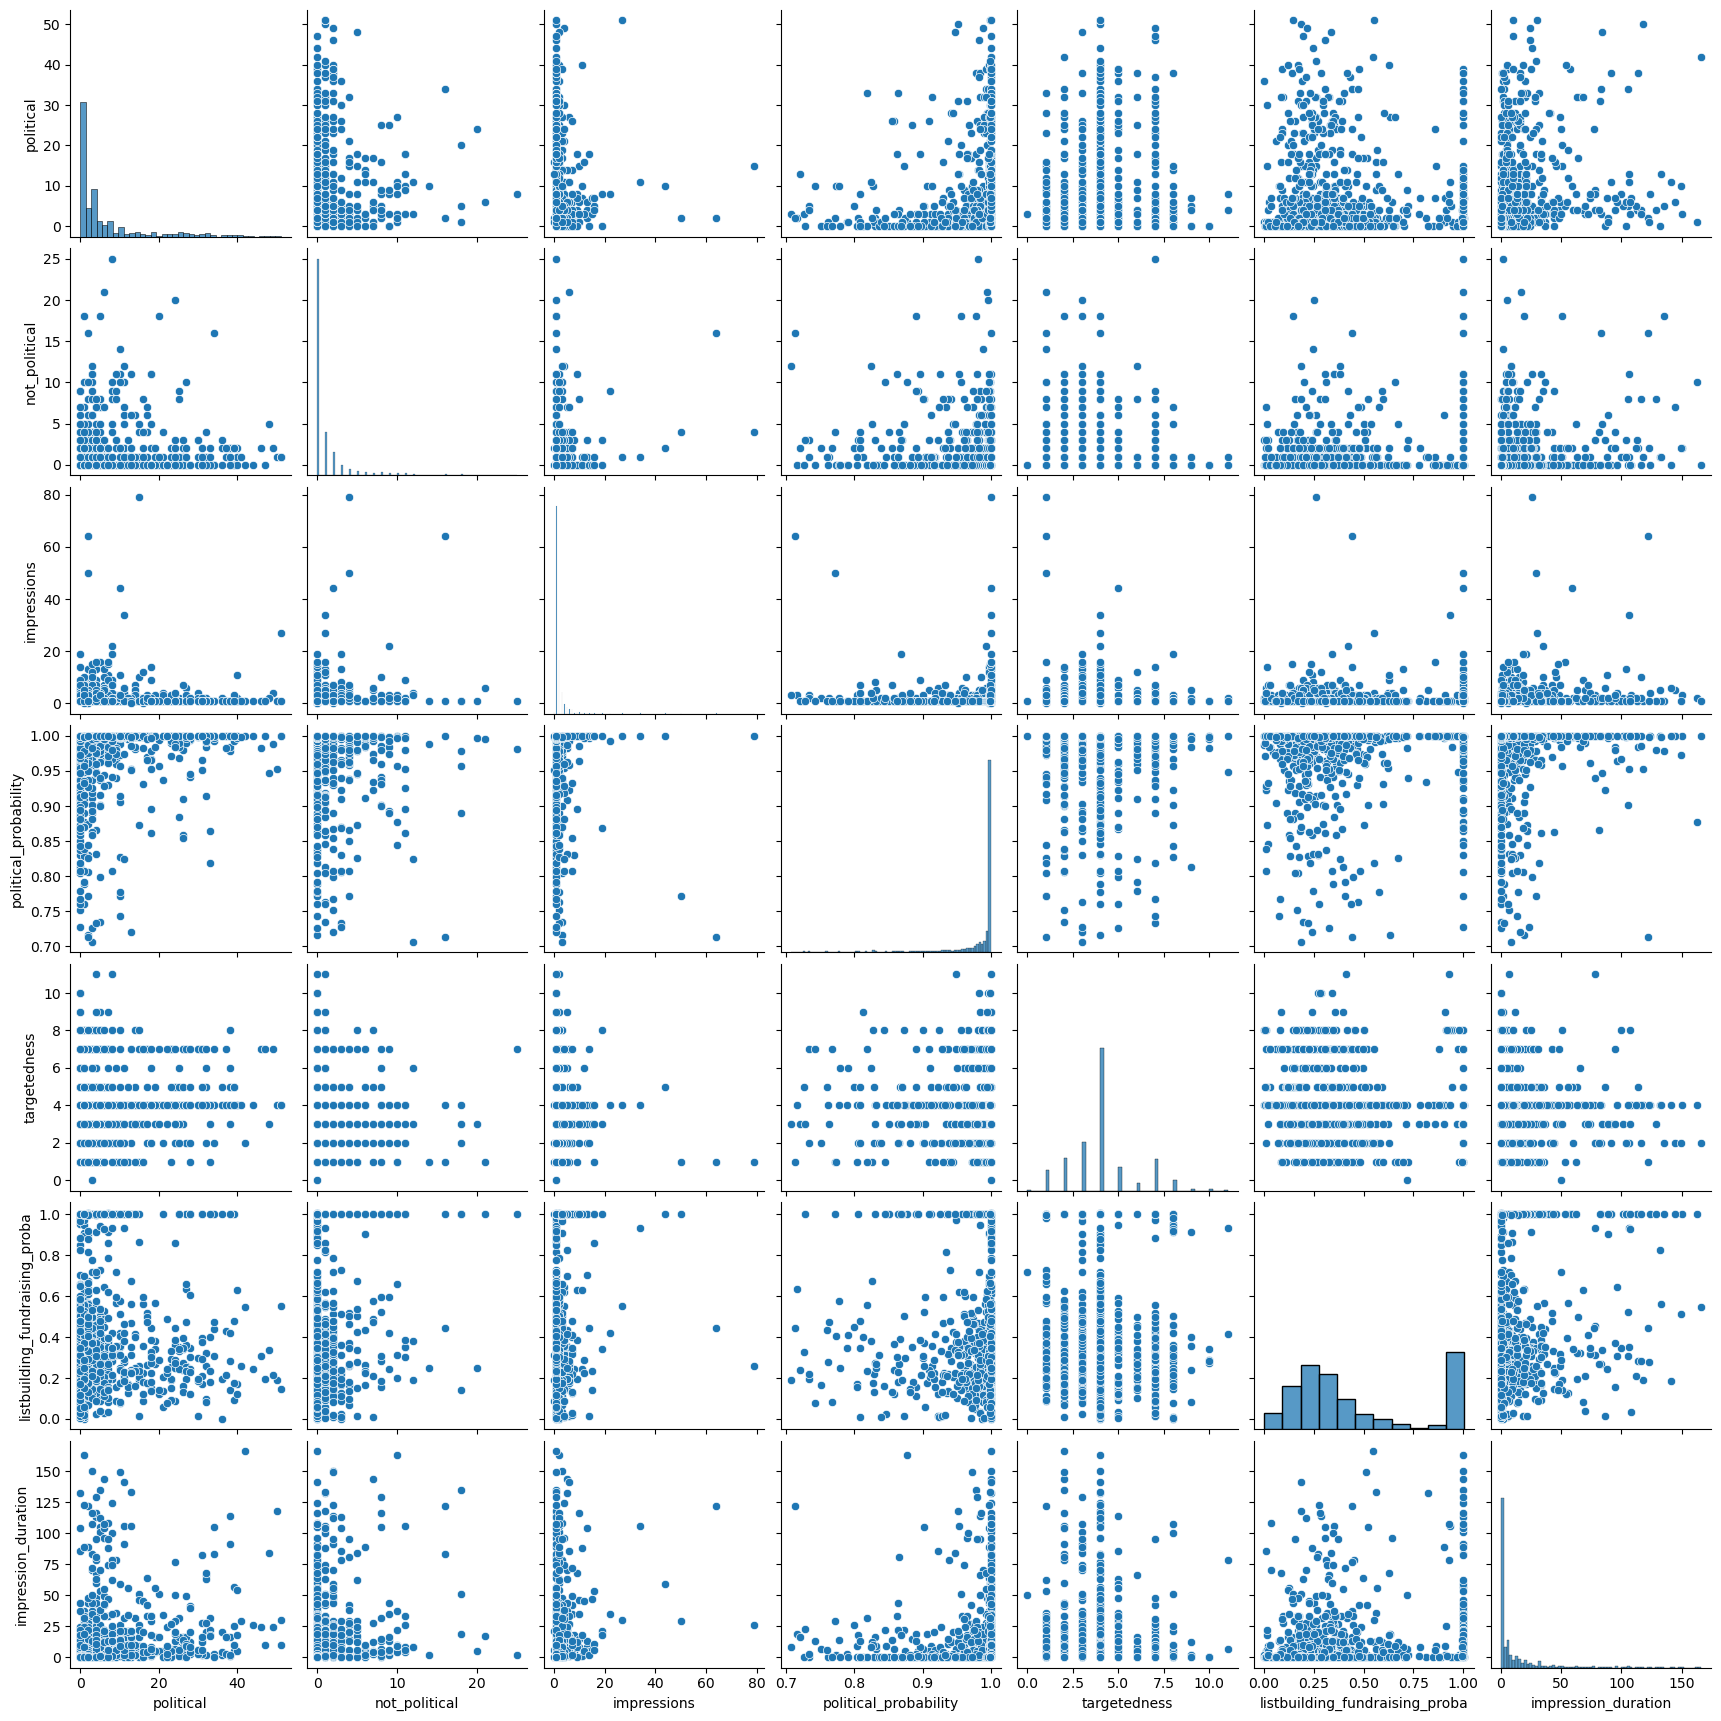

In [28]:
df_sampled = df2.sample(n=1000)
sns.pairplot(df_sampled)

# some ideas to consider down the code on what hypothesis test we will do
#include more pair plots or a correration matrix between and groupby("impression_duration") plot
# include contigency table for categorical data
# political probabilty relationship with number of impression or political probability relationship with paid_for_by or advertiser (they are almost the same values)


In [29]:
df2.head(1)

political  not_political  \
20          0              0   

                                              message  impressions  \
20  Donald Trump HATES anybody that tells the trut...            1   

    political_probability                        targets advertiser  \
20               0.999405  Retargeting,Age,MinAge,Region   BOLD PAC   

     paid_for_by  targetedness  listbuilding_fundraising_proba  \
20  CHC BOLD PAC           3.0                        0.263401   

    impression_duration  
20                    0

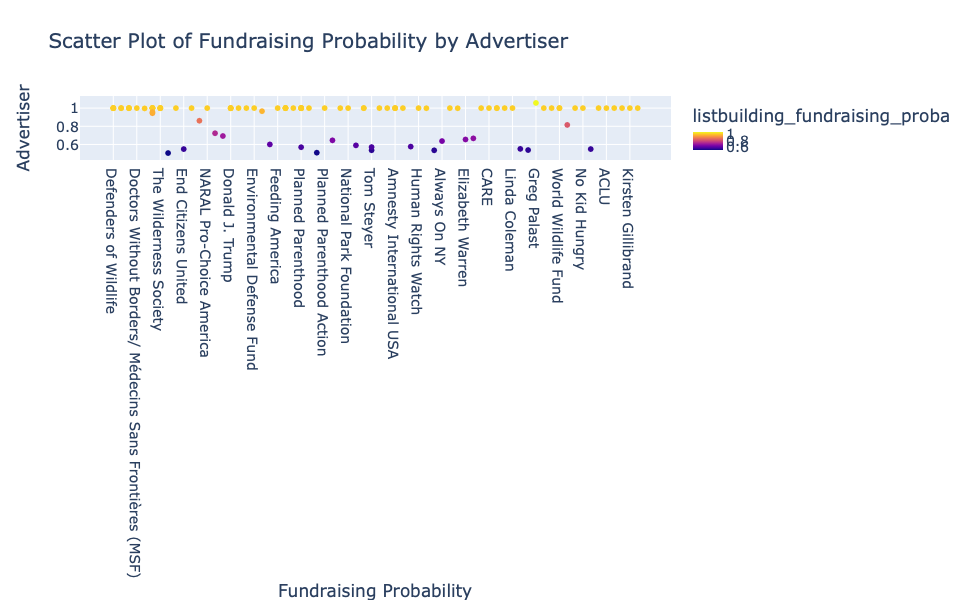

In [48]:
# pairplot to compare which advertiser is likely to get more funding from(listbuilding_fundraising_proba) to drive their agenda in face book
# listbuilding_fundraising_proba :the probability or likelihood of getting funding
most_likely = df2[df2["listbuilding_fundraising_proba"] > 0.5]
fig = px.scatter(most_likely.sample(n = 100), x="advertiser", y="listbuilding_fundraising_proba", color="listbuilding_fundraising_proba",
             #labels={'Fundraising_probability': 'Fundraising_probability'},
             title='advertisers is likely to get more funding ')

fig.update_layout(
    xaxis_title="Fundraising Probability",
    yaxis_title="Advertiser",
    title="Scatter Plot of Fundraising Probability by Advertiser",
    font=dict(size=14),
    width=800,  
    height=600 )
    
fig.show()



In [49]:
most_likely

political  not_political  \
43              5              0   
67              1              3   
75              2              9   
81              0              0   
83              0              0   
...           ...            ...   
162278          2              3   
162285          0              0   
162295          1              1   
162304         43              1   
162316         11              1   

                                                  message  impressions  \
43      NEW POLL: Our opponent just released a poll gi...            1   
67      There is no reason a child should go without f...           10   
75      Right now, our Animal Rescue Team is preparing...            1   
81      Democrats are only TWO seats away from taking ...            1   
83      The wildlife in our oceans are choking on plas...            1   
...                                                   ...          ...   
162278  Large or small. Domestic or wild... Together, ...            1   
162285  Every American has the right to support causes...            3   
162295  When your life is on the ballot, the real ques...            1   
162304  I need to give you an update on Sen. Claire Mc...            1   
162316  Duncan Hunter just launched disturbing and rac...           21   

        political_probability                               targets  \
43                   0.999999             Age,MinAge,Region,Segment   
67                   0.738522         Age,MinAge,Retargeting,Region   
75                   0.928959                Age,MinAge,Region,List   
81                   0.999976  Retargeting,Gender,Age,MinAge,Region   
83                   0.999987         Retargeting,Age,MinAge,Region   
...                       ...                                   ...   
162278               0.763422         Age,MinAge,Retargeting,Region   
162285               0.976914         Age,MinAge,Retargeting,Region   
162295               0.985871         Age,MinAge,City,State,Segment   
162304               1.000000         Age,MinAge,Retargeting,Region   
162316               0.999990    Age,MinAge,Retargeting,Region,List   

                                     advertiser  \
43                                  Angie Craig   
67                                No Kid Hungry   
75                 Humane Society International   
81                                 EMILY's List   
83                               Greenpeace USA   
...                                         ...   
162278  The Humane Society of the United States   
162285                People United for Privacy   
162295                         When We All Vote   
162304                       Kirsten Gillibrand   
162316                 Ammar Campa for Congress   

                                    paid_for_by  targetedness  \
43                     Angie Craig for Congress           4.0   
67                                No Kid Hungry           3.0   
75                 Humane Society International           4.0   
81                                 EMILY's List           7.0   
83                               Greenpeace USA           3.0   
...                                         ...           ...   
162278  The Humane Society of the United States           3.0   
162285                People United for Privacy           3.0   
162295                         When We All Vote           7.0   
162304                    Gillibrand for Senate           4.0   
162316         Ammar Campa-Najjar for Congress.           5.0   

        listbuilding_fundraising_proba  impression_duration  
43                            1.000029                    0  
67                            0.999885                   34  
75                            1.000012                   25  
81                            1.000030                    0  
83                            1.000000                    0  
...                                ...                  ...  
16227

In [30]:
df2.head(1)

political  not_political  \
20          0              0   

                                              message  impressions  \
20  Donald Trump HATES anybody that tells the trut...            1   

    political_probability                        targets advertiser  \
20               0.999405  Retargeting,Age,MinAge,Region   BOLD PAC   

     paid_for_by  targetedness  listbuilding_fundraising_proba  \
20  CHC BOLD PAC           3.0                        0.263401   

    impression_duration  
20                    0

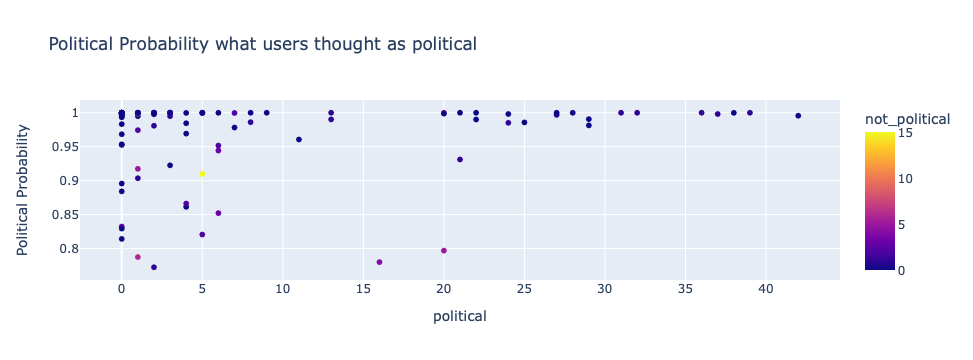

In [18]:
# scatter plot
# Political Probability: likelihood or probability of achieving specific political outcomes or goals through the deployment of these ads
fig = px.scatter(df2.sample(n = 100), x="political", y="political_probability", color="not_political",
             labels={'political_probability': 'Political Probability'},
             title='Political Probability vs what users thought was political')


# Show the plot
fig.show()


In [ ]:
# need further investigation
# why did users not identify political messages that had  political probability of > 0.8 ?

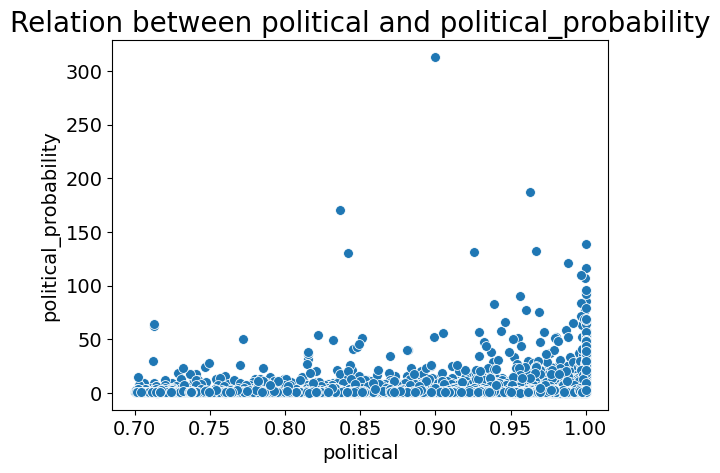

In [19]:
# scatter plot
ax = sns.scatterplot(x='political_probability', y='impressions', data=df2, s=50)

# notations indicating an outlier
ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('political', fontsize=14)
plt.ylabel('political_probability', fontsize=14)
plt.title('Relation between political and political_probability', fontsize=20);


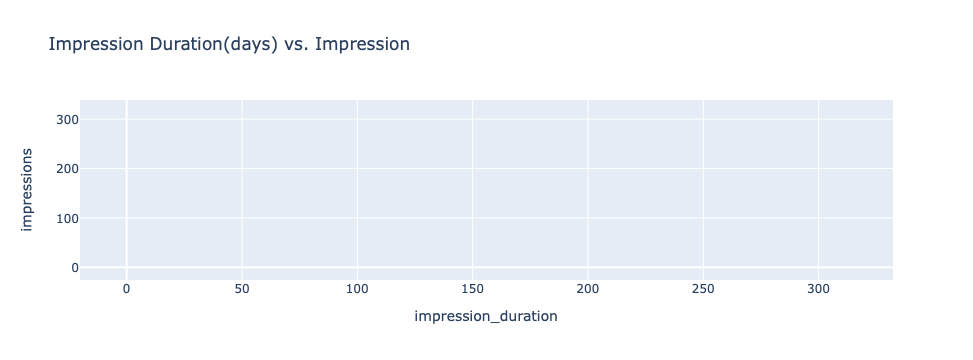

In [50]:
# scatter plot showing how long it took to get an impression
fig = px.scatter(df2, x="impression_duration", y="impressions",
                 title="Impression Duration(days) vs. Impression")
fig.show()

In [53]:
df2.head(1)

political  not_political  \
20          0              0   

                                              message  impressions  \
20  Donald Trump HATES anybody that tells the trut...            1   

    political_probability                        targets advertiser  \
20               0.999405  Retargeting,Age,MinAge,Region   BOLD PAC   

     paid_for_by  targetedness  listbuilding_fundraising_proba  \
20  CHC BOLD PAC           3.0                        0.263401   

    impression_duration  
20                    0

/var/folders/vs/qfbgmrx91qg6xqlsn_h__fm80000gn/T/ipykernel_41379/1064161058.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




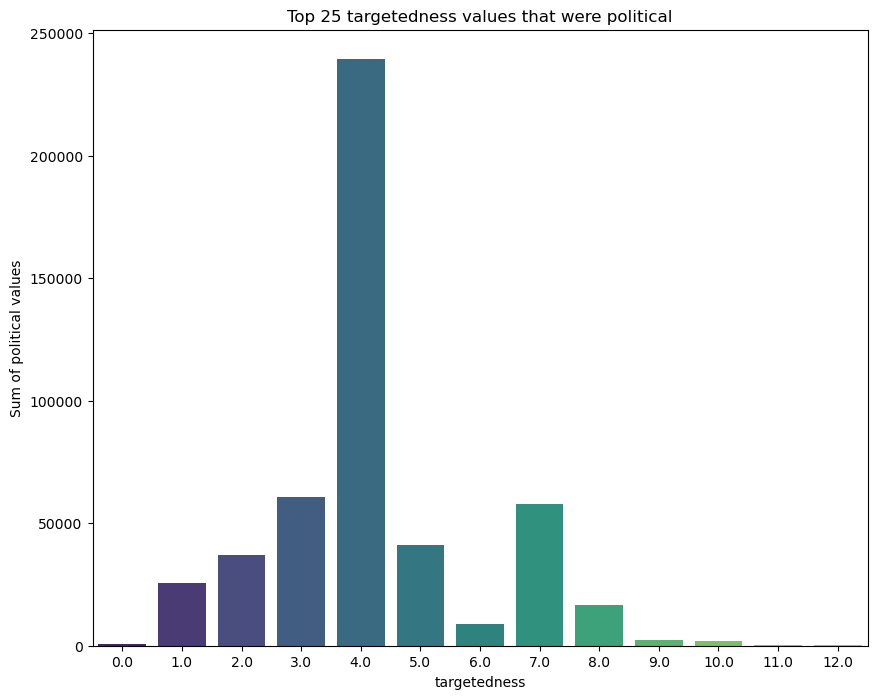

In [54]:

top_25_accurately_targeted_ads = df.groupby('targetedness')['political'].sum().nlargest(25).reset_index()

# Plotting the top 25 locations using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(data=top_25_accurately_targeted_ads, x='targetedness', y='political', palette='viridis')
plt.title('Top 25 targetedness values that were political')
plt.xlabel('targetedness')
plt.ylabel('Sum of political values')
plt.show()

**targetedness** : refers to the precision and specificity with which advertisers can direct their messages to a particular audience based on various demographic, geographic, and interest-based criteria.

**political** :number of Political Ad Collector users who have voted that the ad is political

##investigate category 4 further



## Cleaning Text Data

In [55]:
# Having a look of some of the test in message_text column to understand what need to be cleaned
for index,text in enumerate(df2["message"][44:50]):
  print(f"sample text{(index),text}\n")

sample text(0, 'Climate change means year-round fires in California. But we have the power to stop it. It’s our climate, our vote.')

sample text(1, "Where's your favorite outdoor spot? Race in honor of the places you love to play by joining Team Sierra's Virtual 5k/10k on September 15th!  Register today to get your bib and medal -- all while helping to protect our air and water, support clean energy, and make outdoor experiences accessible to all >> https://sc.org/2P14ntx")

sample text(2, 'Bill Nelson and Rick Scott are in a DEAD HEAT according to the latest polls. Democrats’ chances at taking back the Senate hinge on re-electing Bill Nelson. We need another $1OO,OOO in the bank to fight back against Rick Scott. Can you contribute right now so Florida Democrats can go toe-to-toe against Scott’s dark-money?')

sample text(3, 'A survivor has come forward and shared her story of being sexually assaulted by Brett Kavanaugh. Maine Senator Susan Collins\' response was nothing short of desp

In [56]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will","It’s":"it is",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have","that’s":"that is",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews and target_values
df2["message"]=df2["message"].apply(lambda x:expand_contractions(x))
df2["targets"]=df2["targets"].apply(lambda x:expand_contractions(x))



# Having a look of some of the test in message_text column
for index,text in enumerate(df2["targets"][44:50]):
 print(f"sample text{(index),text}\n")

sample text(0, 'Age,MinAge,MaxAge,Region')

sample text(1, 'Age,MinAge,Interest,Region')

sample text(2, 'Age,MinAge,Retargeting,Region')

sample text(3, 'Age,MinAge,Region,Activity on the Facebook Family')

sample text(4, 'Interest,Age,MinAge,MaxAge,City,State')

sample text(5, 'Age,MinAge,Retargeting,Region')



In [61]:
df2.head(1)

political  not_political  \
20          0              0   

                                              message  impressions  \
20  donald trump hate anybody tell truth — jump ch...            1   

    political_probability                            targets advertiser  \
20               0.999405  retargete , age , minage , region   BOLD PAC   

     paid_for_by  targetedness  listbuilding_fundraising_proba  \
20  CHC BOLD PAC           3.0                        0.263401   

    impression_duration  
20                    0

In [58]:
# Removing digits and words containing digits/lower casing the texts and removing punctuation
df2["message"]=df2["message"].apply(lambda x: re.sub('\w*\d\w*','', x))
df2["message"]=df2["message"].apply(lambda x: x.lower())
df2["message"]=df2["message"].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

df2["targets"]=df2["targets"].apply(lambda x: re.sub('\w*\d\w*','', x))
df2["targets"]=df2["targets"].apply(lambda x: x.lower())

# Dropiing more columns that i find unneccesary for now 
#df2.drop(["targets","entities","targetings"],inplace = True, axis = 1)

# Preparing Text Data for Exploratory Data Analysis (EDA)

In [62]:
df2.columns
#df2["cleaned_message_text"]

Index(['political', 'not_political', 'message', 'impressions',
       'political_probability', 'targets', 'advertiser', 'paid_for_by',
       'targetedness', 'listbuilding_fundraising_proba',
       'impression_duration'],
      dtype='object')

In [63]:
#steps to follow
#Stopwords Removal
#Lemmatization
# Document Term Matrix creation for the cleaned_message_text

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df2["message"]=df2["message"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df2["targets"]=df2["targets"].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


# grouping columns of interest 
#df_grouped = df2[["advertiser", "clean_message"]].groupby(by="advertiser").agg(lambda x: ' '.join(x))

#df_grouped.head()

In [64]:
df2

political  not_political  \
20              0              0   
23              0              0   
32              4              1   
38              4              1   
43              5              0   
...           ...            ...   
162317          0              0   
162319         12              0   
162320          0              0   
162321          0              0   
162323          0              0   

                                                  message  impressions  \
20      donald trump hate anybody tell truth — jump ch...            1   
23                                 republican simple quiz            5   
32      fight robust public education system    order ...            3   
38      human right optional available man    woman ts...            2   
43      new poll opponent release poll point advantage...            1   
...                                                   ...          ...   
162317                     fight vulnerable time time win            1   
162319     rep katko vote tax break wealthy donorsand pay            1   
162320  illinois early vote open    neighbor vote conf...            1   
162321  favorite peak polling place pow action fund ge...            1   
162323  claim free aclu voter sticker today ready vote...            3   

        political_probability                                  targets  \
20                   0.999405        retargete , age , minage , region   
23                   0.988258         age , minage , language , region   
32                   0.980431         age , minage , interest , region   
38                   0.876987             age , minage , region , like   
43                   0.999999          age , minage , region , segment   
...                       ...                                      ...   
162317               0.997852   interest , age , minage , city , state   
162319               0.999962       age , minage , city , state , list   
162320               0.999972             list , age , minage , region   
162321               0.997301          segment , age , minage , region   
162323               0.999988  age , minage , maxage , gender , region   

                                         advertiser  \
20                                         BOLD PAC   
23                  Secure Financial Advisory Group   
32                      Great Public Schools for US   
38                               The Christian Left   
43                                      Angie Craig   
...                                             ...   
162317                                   Tish James   
162319                        Keep Them Accountable   
162320  National Republican Congressional Committee   
162321                              POW Action Fund   
162323                                         ACLU   

                                              paid_for_by  targetedness  \
20                                           CHC BOLD PAC           3.0   
23                        Secure Financial Advisory Group           2.0   
32                            Great Public Schools for US           4.0   
38                                     The Christian Left           2.0   
43                               Angie Craig for Congress           4.0   
...                                                   ...           ...   
162317                                       James for NY           7.0   
162319  HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...           7.0   
162320  the NRCC and not authorized by any candidate o...           4.0   
162321                    Protect Our Winters Action Fund           4.0   
162323                                           the ACLU           6.0   

        listbuilding_fundraising_proba  impression_duration  
20                            0.263401                    0  
23                            0.213583                    1  
32                            0.424885           

In [66]:

# Dropiing more columns that i find unneccesary for now 

df2.reset_index(drop=True, inplace=True)

In [67]:
df2.head(2)

political  not_political  \
0          0              0   
1          0              0   

                                             message  impressions  \
0  donald trump hate anybody tell truth — jump ch...            1   
1                             republican simple quiz            5   

   political_probability                            targets  \
0               0.999405  retargete , age , minage , region   
1               0.988258   age , minage , language , region   

                        advertiser                      paid_for_by  \
0                         BOLD PAC                     CHC BOLD PAC   
1  Secure Financial Advisory Group  Secure Financial Advisory Group   

   targetedness  listbuilding_fundraising_proba  impression_duration  
0           3.0                        0.263401                    0  
1           2.0                        0.213583                    1

In [68]:
# grouping columns of interest that we want to further analyse

df_grouped = df2[["message", "targets","advertiser"]].groupby(by="message").agg(lambda x: ' '.join(x))
df_grouped["targets"] = df_grouped["targets"].apply(lambda x: ' '.join(list(set([token.strip() for token in x.split(',')]))))
df_grouped.head()



targets  \
message                                                                                                 
                                                    region gender minage website retargete list ma...   
        orange county resident preexist conditi...               minage state age city age state list   
       million    people        patient    acti...                        region retargete minage age   
      flag pole    stand     shopstandflagpoles...      region gender minage region age retargete age   
     aclu    voter      commit      vote    lik...               region gender minage maxage age list   

                                                                                           advertiser  
message                                                                                                
                                                    350.org Cort VanOstran for Congress The Daily ...  
        orange county resident preexist conditi...                          Katie Porter Katie Porter  
       million    people        patient    acti...                        AMA Patients Action Network  
      flag pole    stand     shopstandflagpoles...  I'll go ahead and keep my guns, Thanks I'll go...  
     aclu    voter      commit      vote    lik...                                               ACLU

Text(0.5, 1.0, 'Outliers in 6 numerical columns')

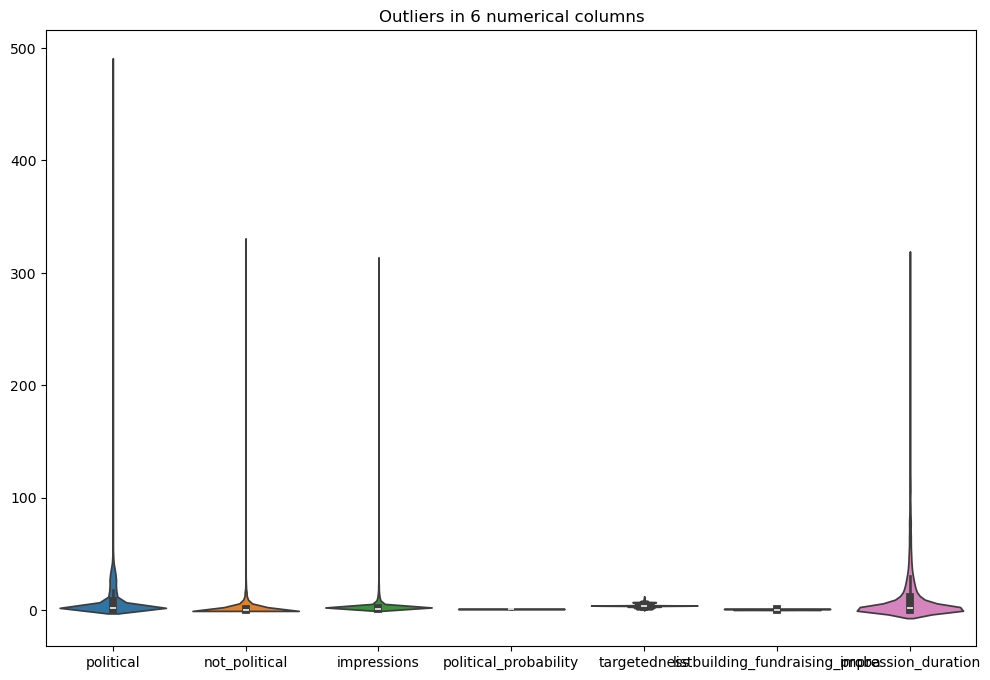

In [69]:
#Visual_outliers  
plt.figure(figsize=(12, 8))
sns.violinplot(data=df2)
plt.title("Outliers in 6 numerical columns")
    


In [36]:
print(df_grouped.columns)


Index(['targets', 'advertiser'], dtype='object')


In [75]:
# Creating Document Term Matrix

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped["targets"]) # continue tommorrow and see if you can fit more options also try to make a (dense_matrix = data.todense())dence matrix
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(10)

activity  age  agency  \
message                                                                     
                                                           1    5       0   
        orange county resident preexist conditi...         0    2       0   
       million    people        patient    acti...         0    1       0   
      flag pole    stand     shopstandflagpoles...         0    2       0   
     aclu    voter      commit      vote    lik...         0    1       0   
     aclu    voter      commit      vote    lik...         0    2       0   
     aclu    voter      commit      vote    lik...         0    2       0   
     aclu    voter      commit      vote    lik...         0    2       0   
     americans oppose overturn roe v wade add              0    2       0   
     americans rely air medical transport reach...         0    1       0   

                                                    city  content  engage  \
message                                                                     
                                                       2        0       0   
        orange county resident preexist conditi...     1        0       0   
       million    people        patient    acti...     0        0       0   
      flag pole    stand     shopstandflagpoles...     0        0       0   
     aclu    voter      commit      vote    lik...     0        0       0   
     aclu    voter      commit      vote    lik...     0        0       0   
     aclu    voter      commit      vote    lik...     0        0       0   
     aclu    voter      commit      vote    lik...     0        0       0   
     americans oppose overturn roe v wade add          0        0       0   
     americans rely air medical transport reach...     0        0       0   

                                                    facebook  family  gender  \
message                                                                        
                                                           1       1       1   
        orange county resident preexist conditi...         0       0       0   
       million    people        patient    acti...         0       0       0   
      flag pole    stand     shopstandflagpoles...         0       0       1   
     aclu    voter      commit      vote    lik...         0       0       1   
     aclu    voter      commit      vote    lik...         0       0       1   
     aclu    voter      commit      vote    lik...         0       0       1   
     aclu    voter      commit      vote    lik...         0       0       1   
     americans oppose overturn roe v wade add              0       0       0   
     americans rely air medical transport reach...         0       0       0   

                                                    interest  language  like  \
message                                                                        
                                                           1         0     0   
        orange county resident preexist conditi...         0         0     0   
       million    people        patient    acti...         0         0     0   
      flag pole    stand     shopstandflagpoles...         0         0     0   
     aclu    voter      commit      vote    lik...         0         0     0   
     aclu    voter      commit      vote    lik...         0         0     0   
     aclu    voter      commit      vote    lik...         0         0     0   
     aclu    voter      commit      vote    lik...         0         0     0   
     americans oppose overturn roe v wade add              1         0     0   
     americans rely air medical transport reach...         1         0     0   

                                                    list  maxage  minage  \
message                                                                    
                                                       1       1       1   
        orange county resident preexist conditi...  

In [74]:
# Assuming data is a sparse matrix
#sparse_matrix = csr_matrix(df_dtm)

# Convert sparse matrix to dense matrix
#dense_matrix = sparse_matrix.todense()

#dense_matrix 

matrix([[1, 5, 0, ..., 0, 2, 1],
        [0, 2, 0, ..., 0, 2, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 3, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
# Sum the counts of each word across the message column
word_counts = df_dtm.sum()

# Sorted words based on total counts descending 
sorted_word_counts = word_counts.sort_values(ascending=False)

#top 20 words
top_20_words = sorted_word_counts.head(20)

# Display the top 20 words
print(f" Top 20 words in message: {top_20_words}")


/Users/ericthande/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:84: UserWarning:

Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.

/Users/ericthande/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.



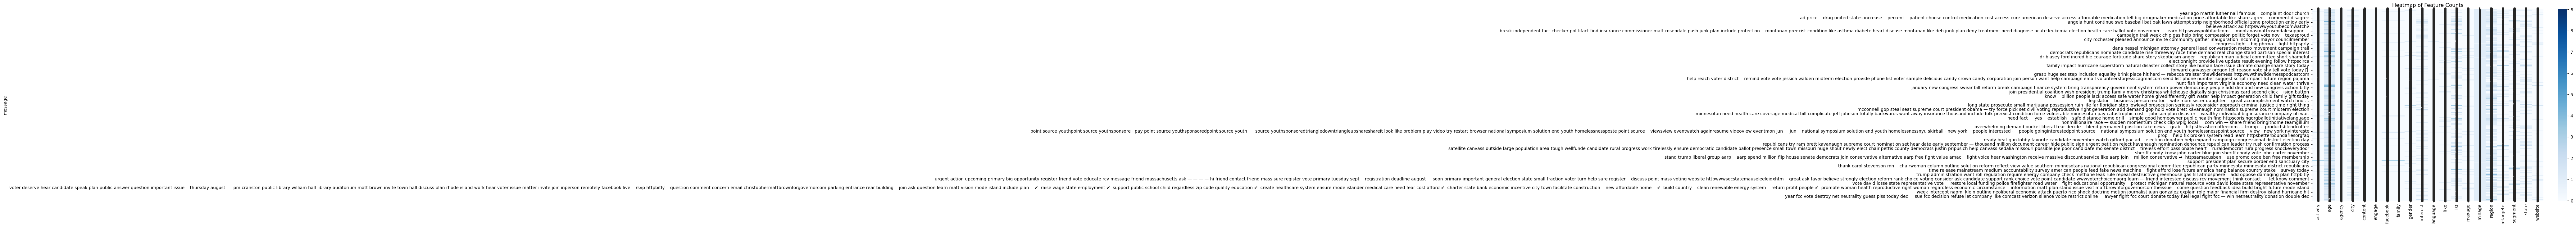

In [81]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_dtm, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Feature Counts')
plt.show()

## Hypothesis testing

**Hyothesis test 1 statement** : Is there any difference in targetedness scores between messages with the highest targets and other messages

H0:There is no difference in targetedness scores between messages with the highest targets and other messages

H1:There is a significant difference in targetedness scores between messages with the highest targets and other messages

In [83]:
# Shapiro-Wilk test
statistic, p_value = shapiro(df2["targetedness"])

# Print the results
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")


alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Statistic: 0.8960938453674316
P-value: 0.0
Sample does not look Gaussian (reject H0)


/Users/ericthande/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [94]:

unique_values = df2['targetedness'].unique().tolist()
print(unique_values)

[3.0, 2.0, 4.0, 8.0, 7.0, 5.0, 6.0, 1.0, 9.0, 0.0, 10.0, 11.0, 12.0]


In [95]:

# A targetedness and message  filtering
more_targeted = df2[df2['targetedness'] >= 6]['message']
less_targeted = df2[df2['targetedness'] < 6]['message']

# Drop NaN values
#more_targeted = more_targeted.dropna()
#less_targeted = less_targeted.dropna()

# Perform scipy.stats.ranksums test
#u_stat, p_value = stats.mannwhitneyu(more_targeted, less_targeted)
statistic, p_value = stats.ranksums(more_targeted, less_targeted)


# Output the results
print(f"statistic: {statistic}")
print(f"P-value: {p_value}")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("TThere is no difference in targetedness scores between messages with the highest targets and other messages.")
else:
    print("There is a significant difference in targetedness scores between messages with the highest targets and other messages.")


statistic: -0.8953769388896923
P-value: 0.37058562401287287
There is a significant difference in targetedness scores between messages with the highest targets and other messages.


**Hypthesis 2** : Is there any significant difference between that the users flagged as political and the Political Probability used in the classification model to classify the data collected?
Null Hypothesis (H0):There is no significant correlation between the Political Probability  and users' perception of political content. 

Alternative Hypothesis (H1):There is a significant correlation between the Political Probability and users' perception of political content. 


In [80]:

correlation, p_value = stats.pearsonr(df2['political_probability'], df['political'])

# results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# statistical significance
alpha = 0.05  
if p_value < alpha:
    print("The correlation is statistically significant (reject the null hypothesis)")
else:
    print("There is not enough evidence to reject the null hypothesis")

Pearson Correlation Coefficient: 0.04691442911767461
P-value: 9.300663809789202e-35
The correlation is statistically significant (reject the null hypothesis)
